In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
raw_df = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
raw_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
raw_df.dropna(subset=['GenHealth','Asthma','KidneyDisease','SkinCancer'], inplace=True)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
df = raw_df

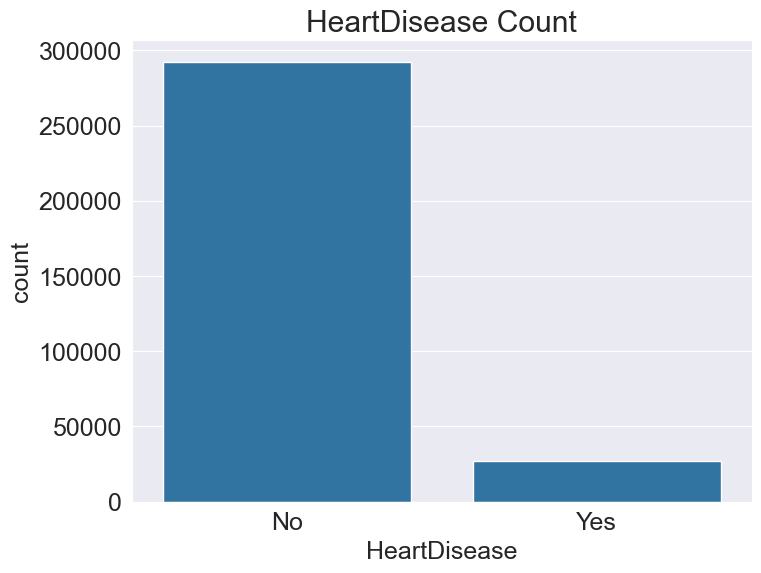

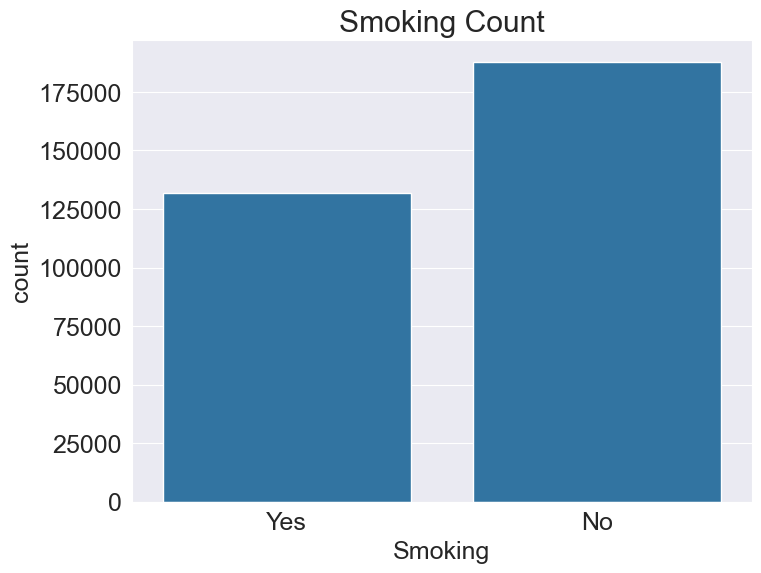

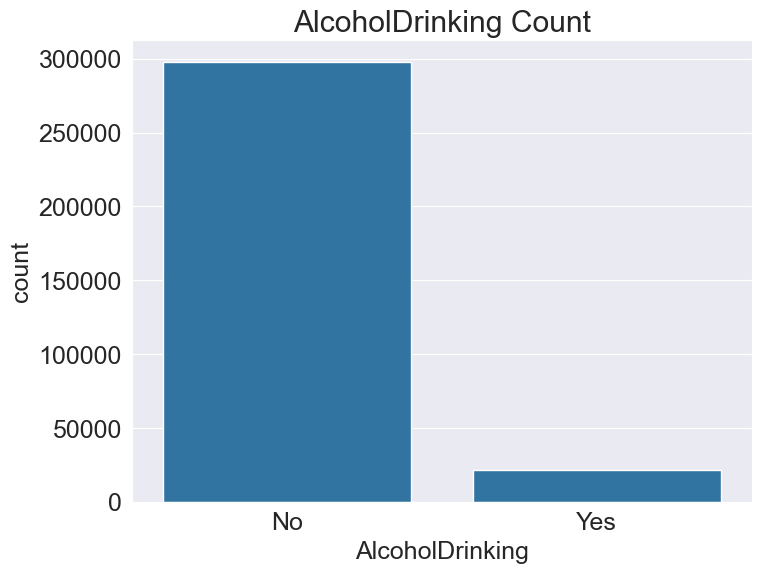

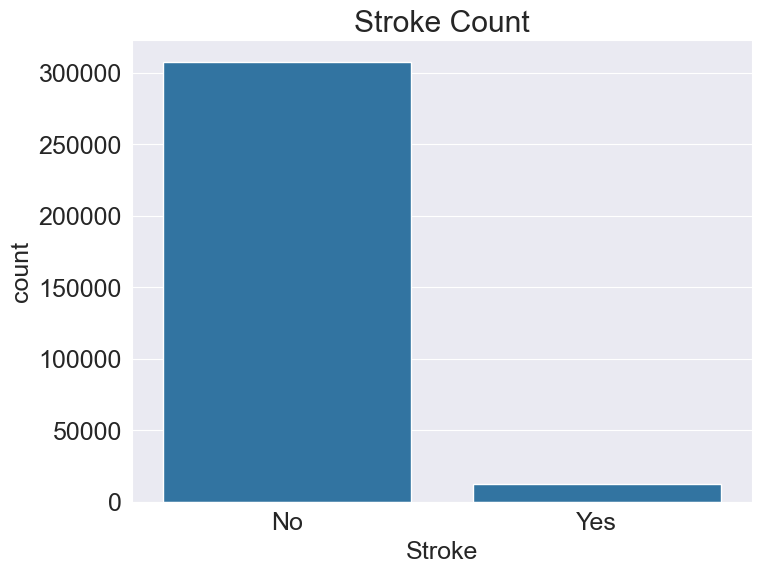

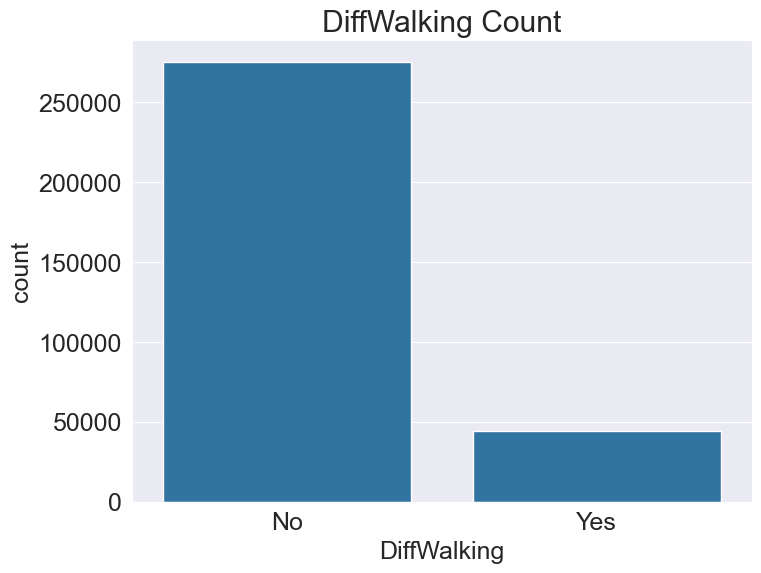

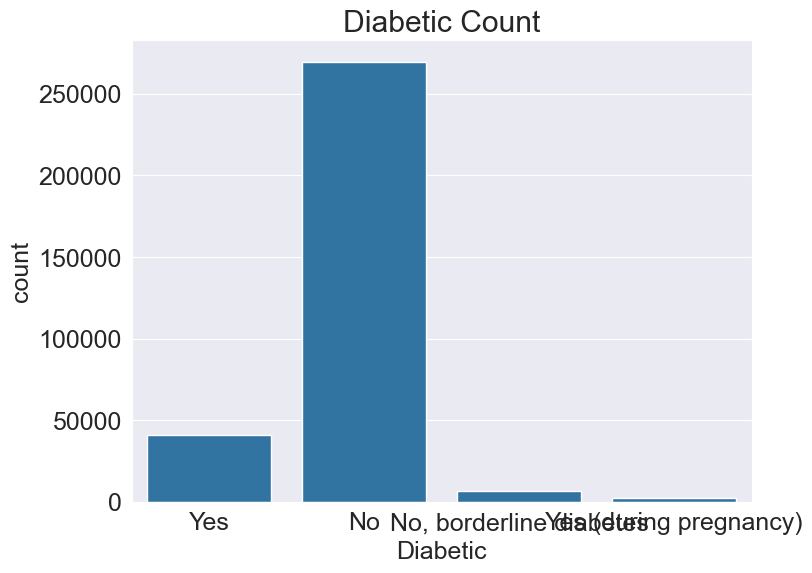

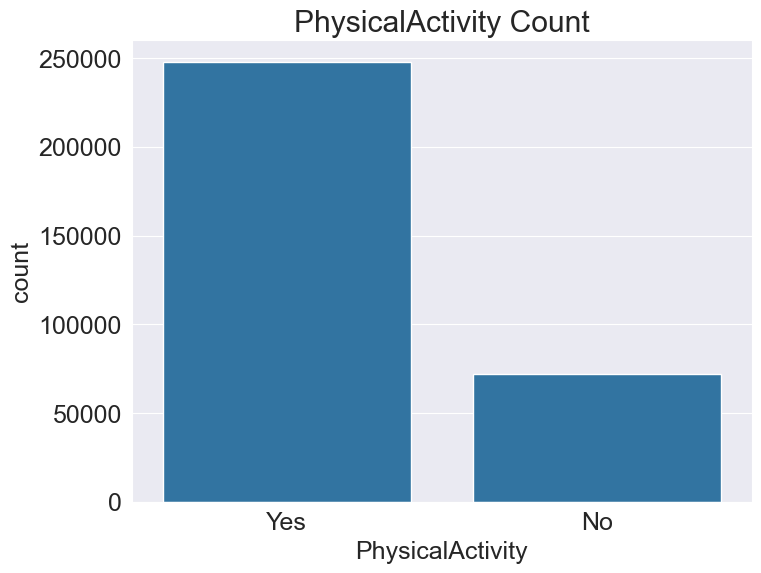

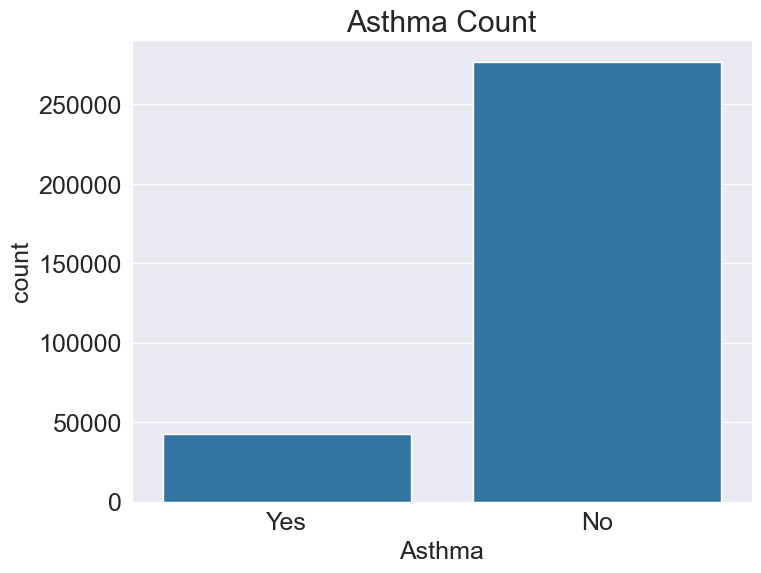

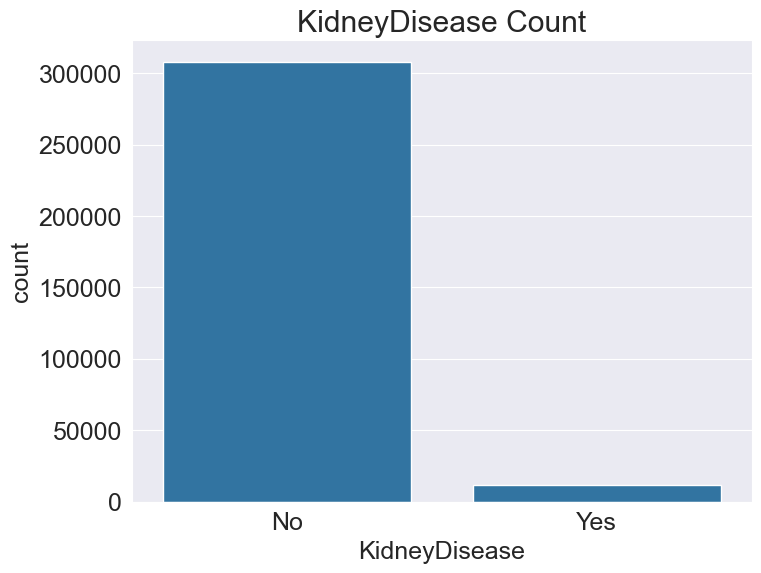

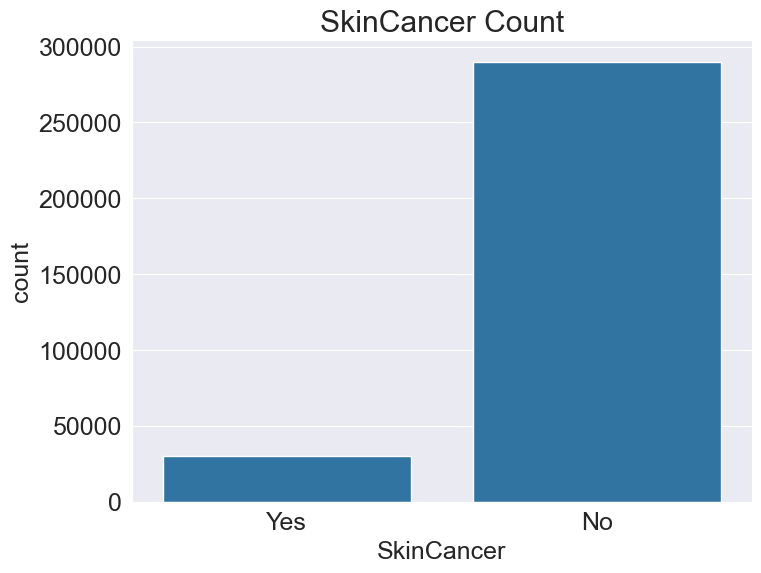

In [9]:
# List of columns with 'Yes' and 'No' responses
yes_no_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Create bar charts for each column
for column in yes_no_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'{column} Count')
    plt.show()


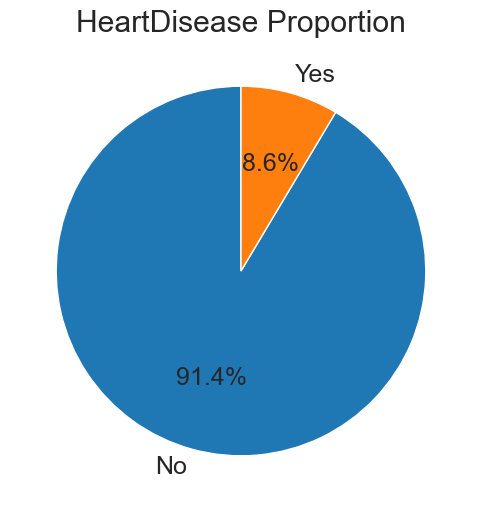

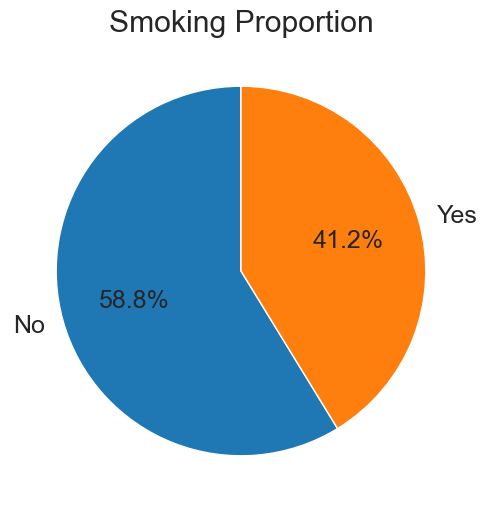

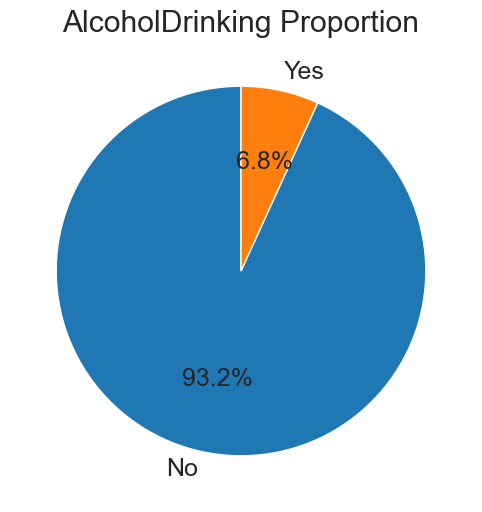

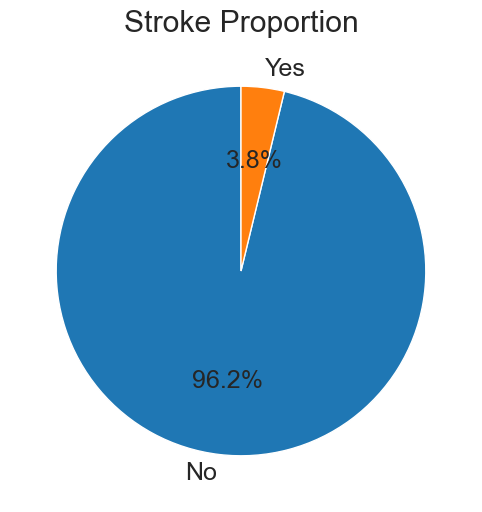

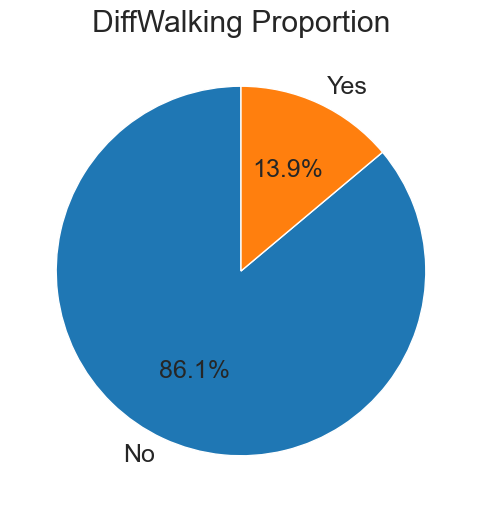

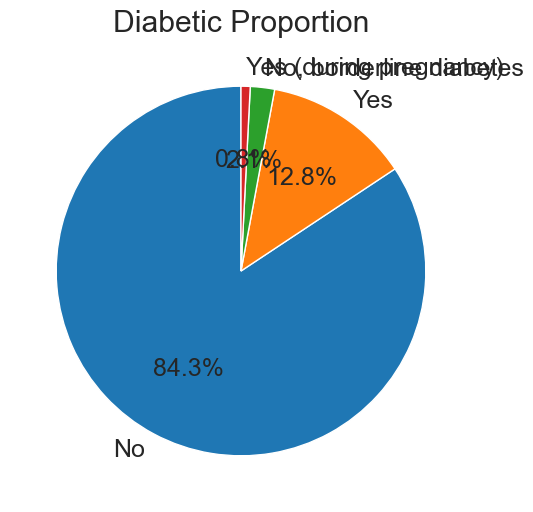

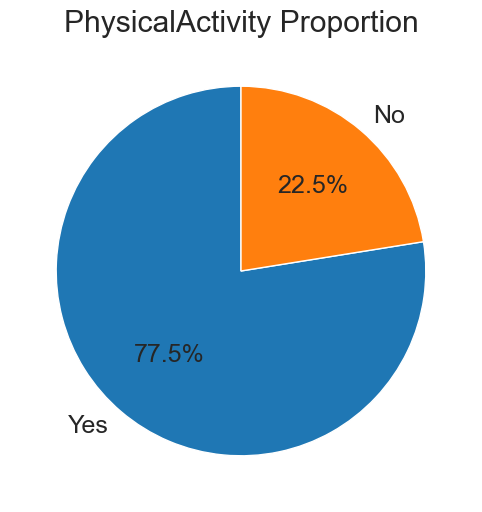

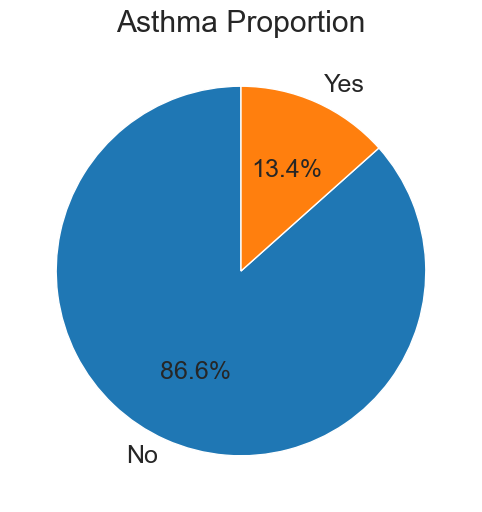

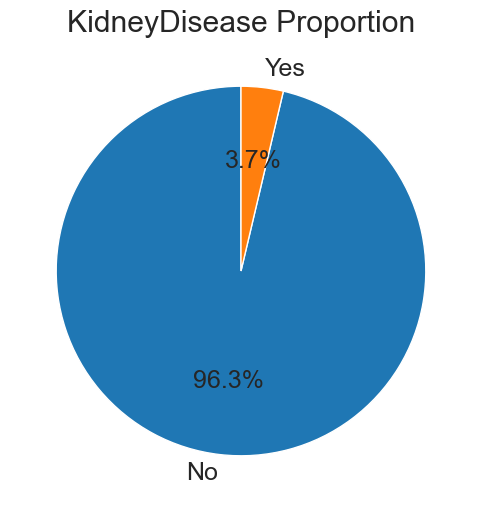

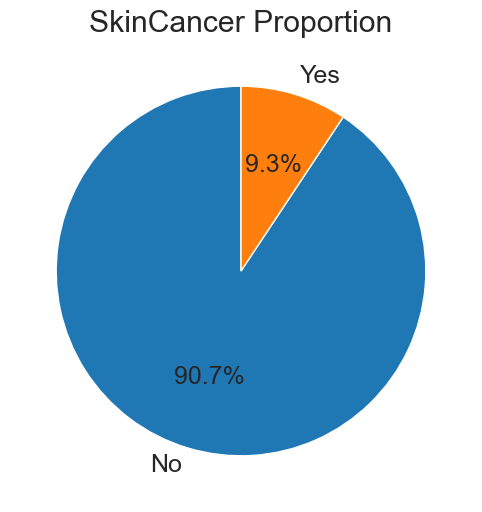

In [10]:
# Create pie charts for each column
for column in yes_no_columns:
    plt.figure(figsize=(8, 6))
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Proportion')
    plt.show()


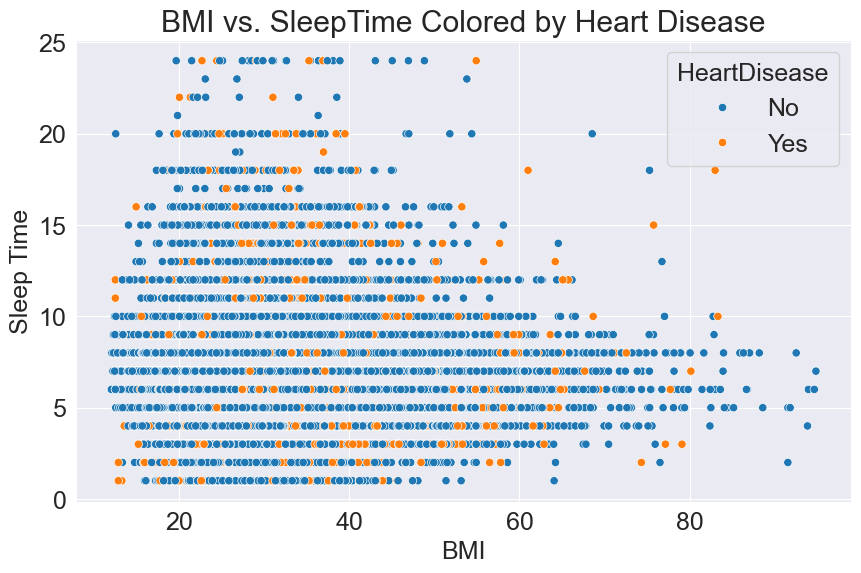

In [11]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='SleepTime', hue='HeartDisease', data=df)
plt.title('BMI vs. SleepTime Colored by Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Sleep Time')
plt.show()


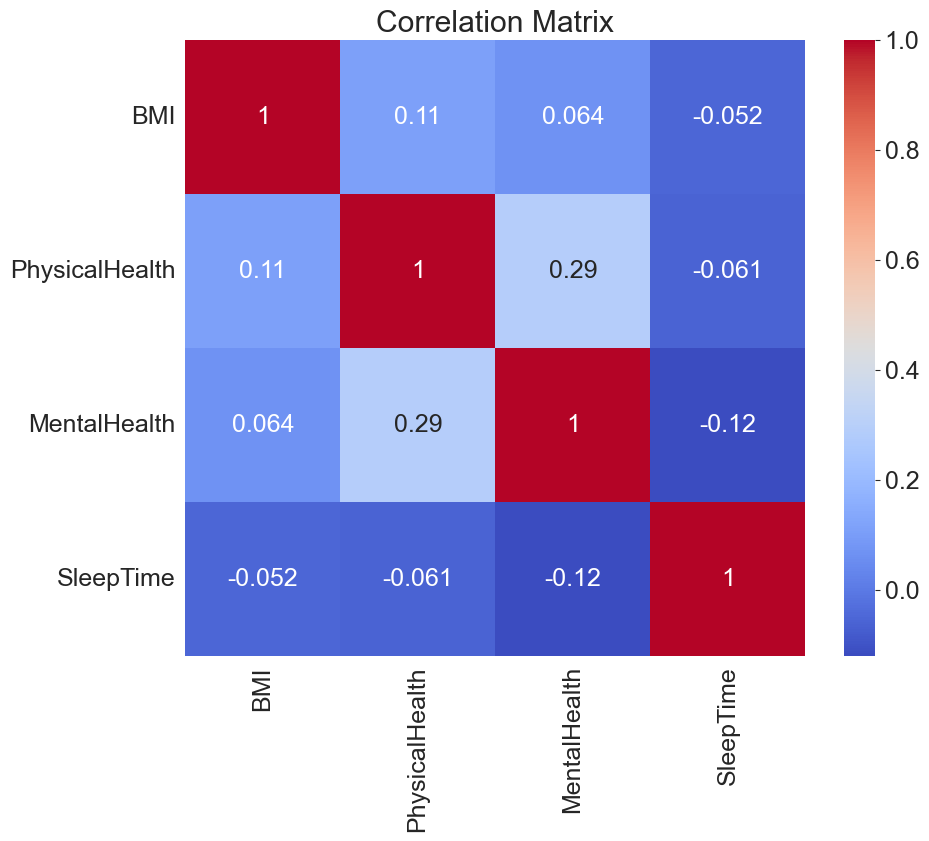

In [12]:
# Heatmap of Correlation Matrix
correlation_matrix = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


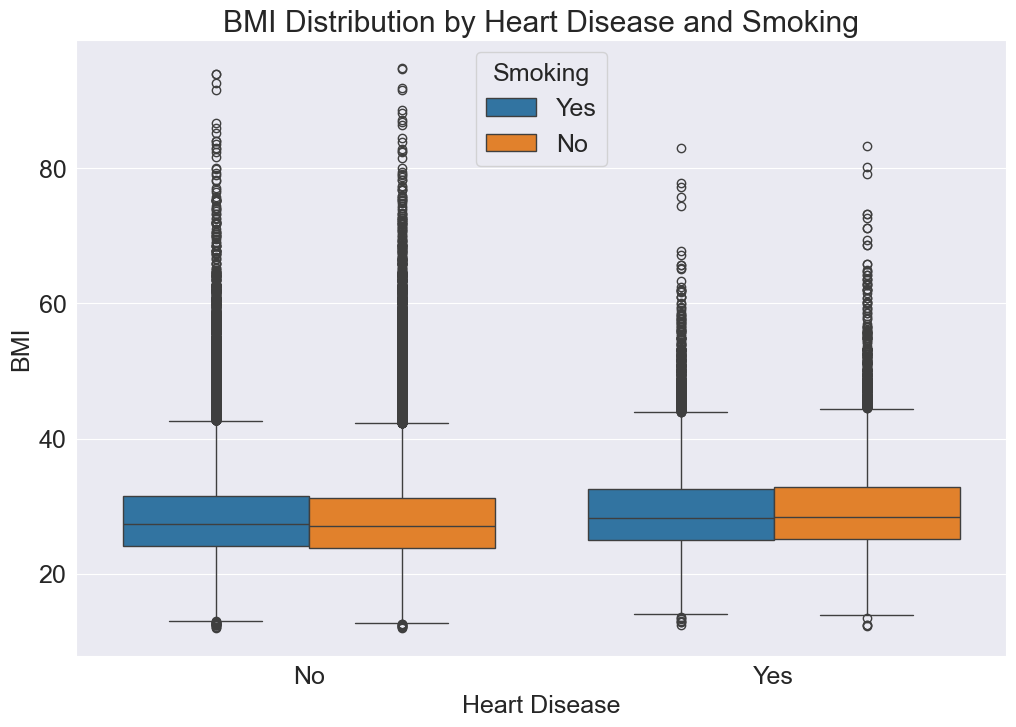

In [13]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='BMI', hue='Smoking', data=df)
plt.title('BMI Distribution by Heart Disease and Smoking')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()


In [14]:
contigency_table = pd.crosstab(df['Smoking'],['Heartdisease'])

In [15]:
print(contigency_table)

col_0    Heartdisease
Smoking              
No             187887
Yes            131908


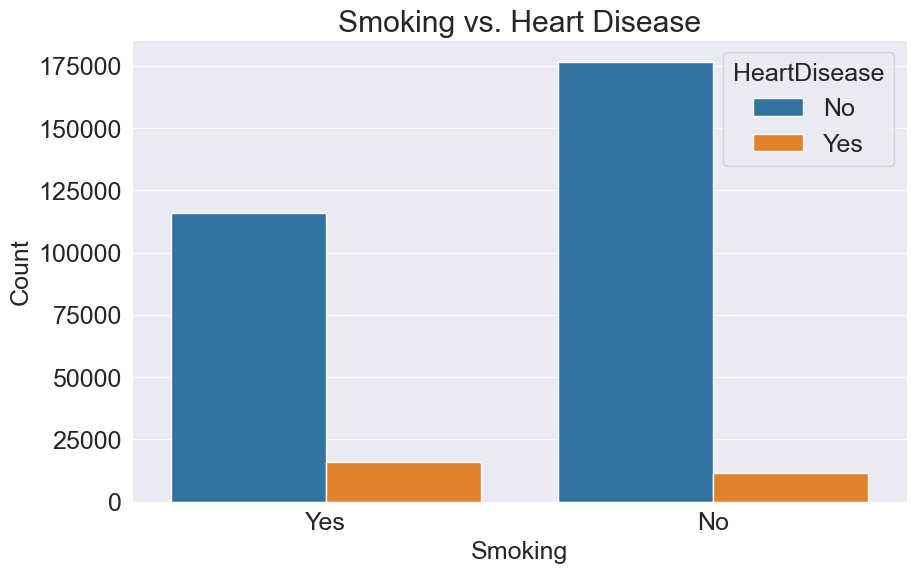

In [16]:
# Bar Chart for Smoking vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title('Smoking vs. Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()


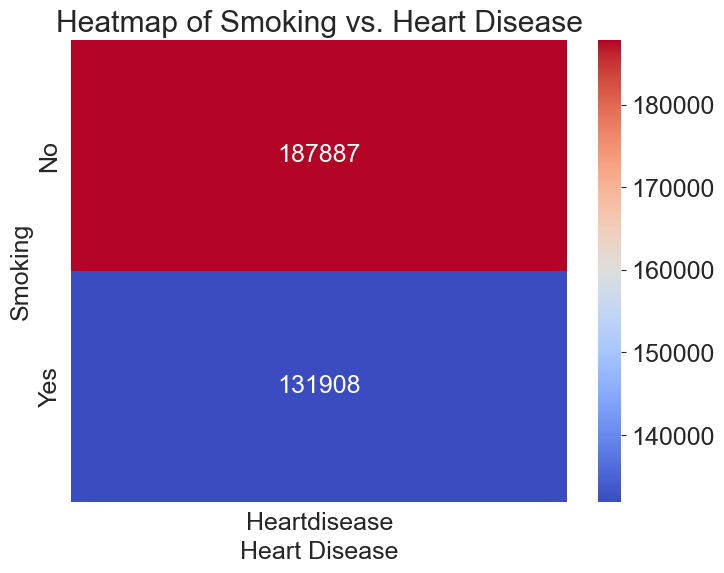

In [18]:
# Heatmap of Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(contigency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Smoking vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Smoking')
plt.show()


HeartDisease         No    Yes
AlcoholDrinking               
No               271786  26232
Yes               20636   1141


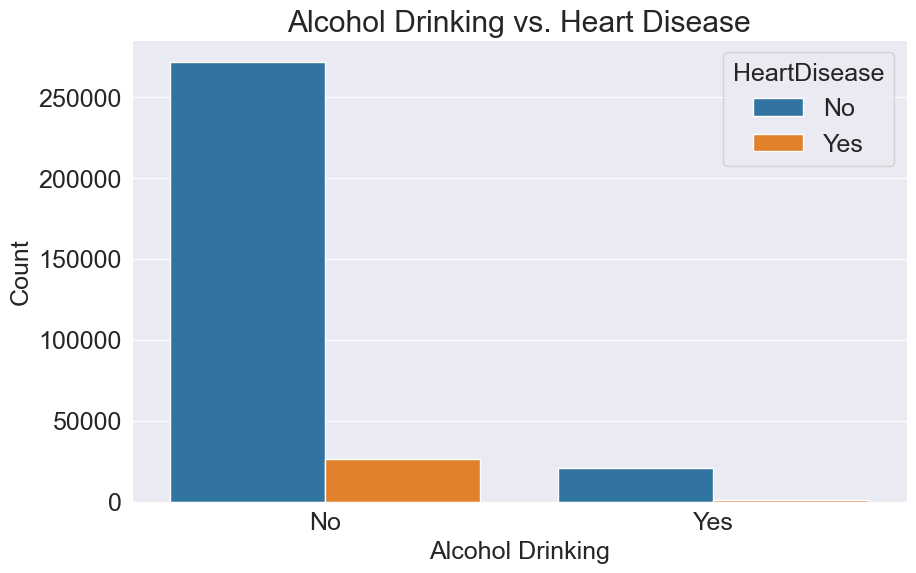

In [19]:
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])
print(contingency_table)

# Bar Chart for Alcohol Drinking vs. Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=df)
plt.title('Alcohol Drinking vs. Heart Disease')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Count')
plt.show()

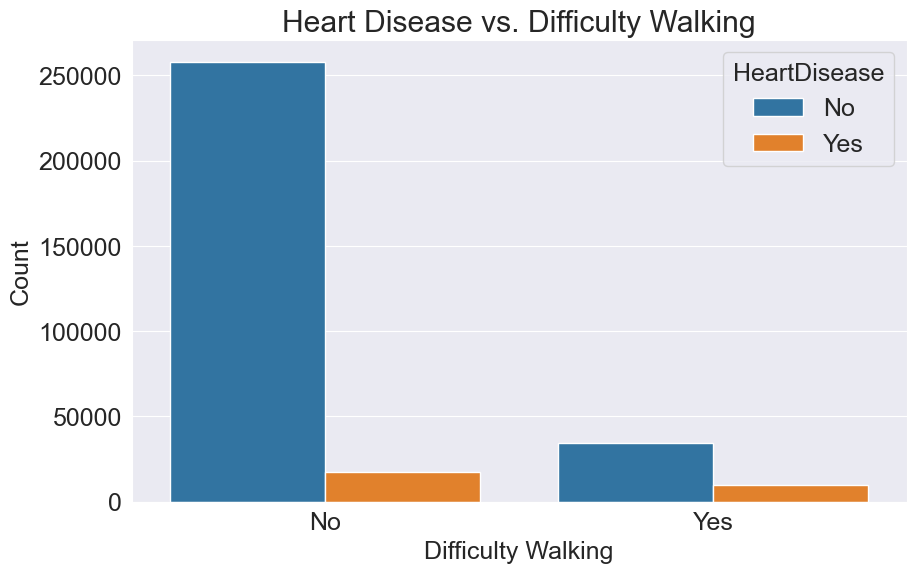

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DiffWalking', hue='HeartDisease', data=df)
plt.title('Heart Disease vs. Difficulty Walking')
plt.xlabel('Difficulty Walking')
plt.ylabel('Count')
plt.show()

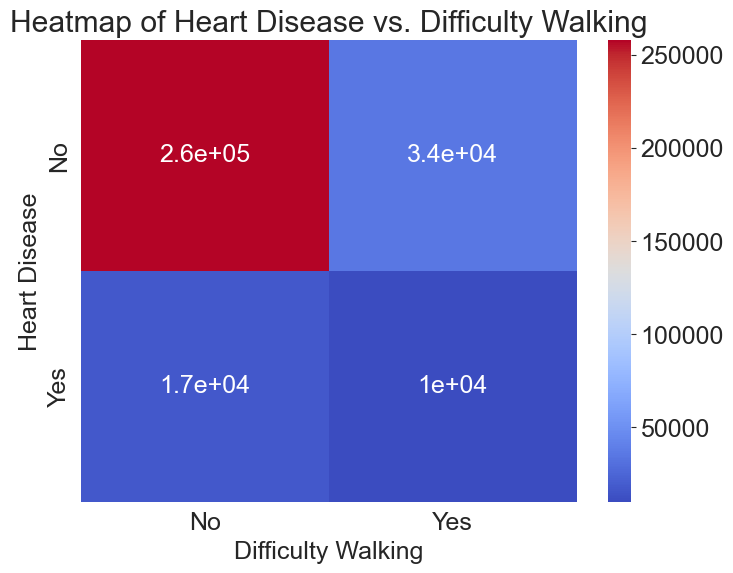

In [26]:
heatmap_data = df.groupby(['HeartDisease', 'DiffWalking']).size().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Heart Disease vs. Difficulty Walking')
plt.xlabel('Difficulty Walking')
plt.ylabel('Heart Disease')
plt.show()

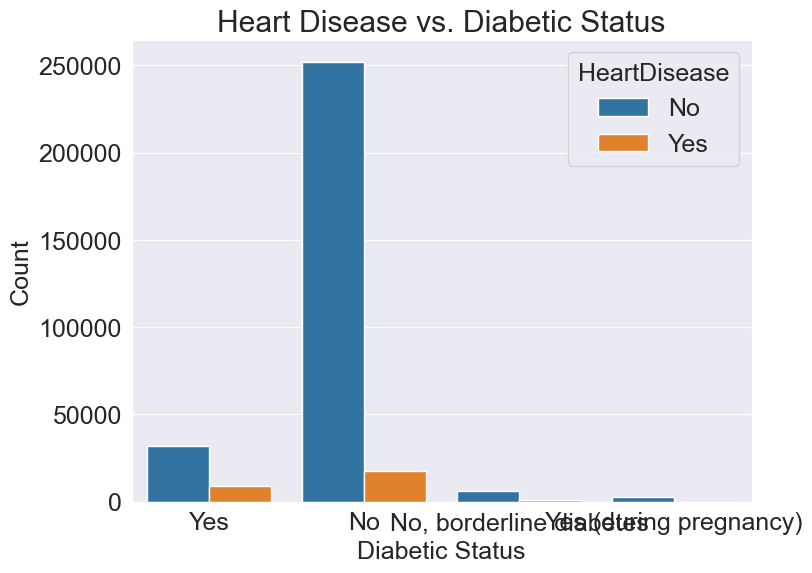

In [21]:
# Bar Chart for Heart Disease vs. Diabetic
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetic', hue='HeartDisease', data=df)
plt.title('Heart Disease vs. Diabetic Status')
plt.xlabel('Diabetic Status')
plt.ylabel('Count')
plt.show()


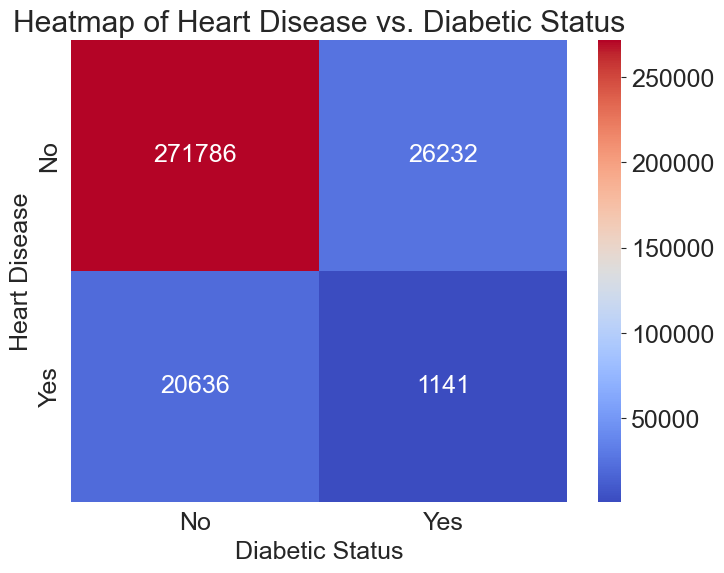

In [22]:
# Heatmap of Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Heart Disease vs. Diabetic Status')
plt.xlabel('Diabetic Status')
plt.ylabel('Heart Disease')
plt.show()



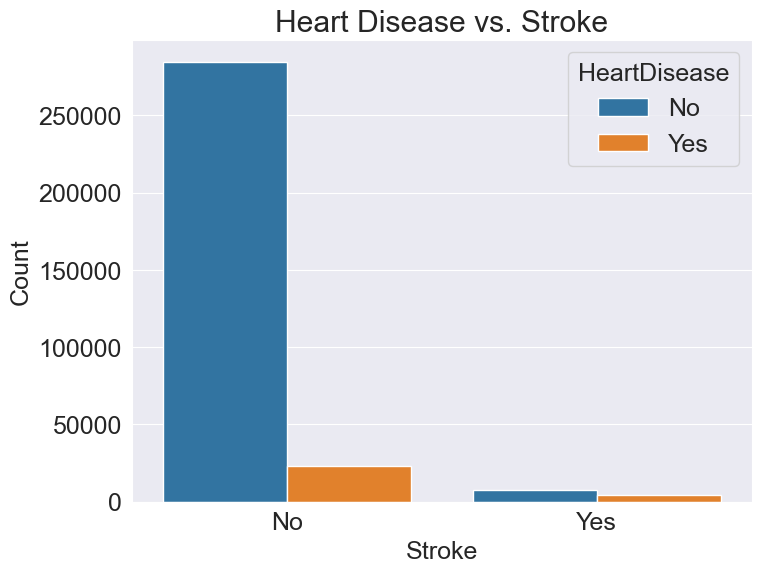

In [23]:
# Bar Chart for Heart Disease vs. Stroke
plt.figure(figsize=(8, 6))
sns.countplot(x='Stroke', hue='HeartDisease', data=df)
plt.title('Heart Disease vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


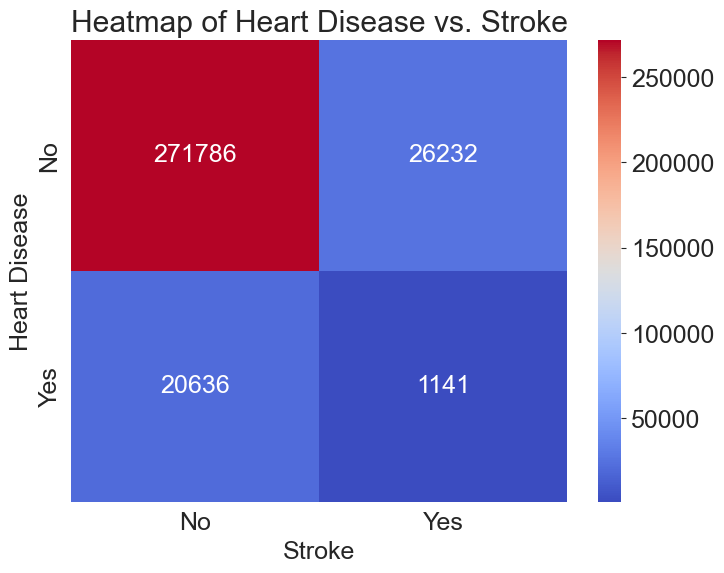

In [24]:
# Heatmap of Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Heart Disease vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')
plt.show()


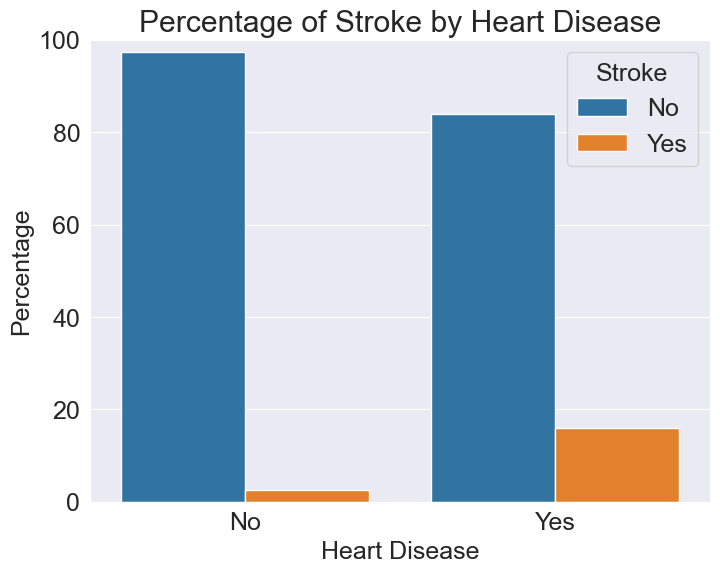

In [25]:
# Calculate percentage of Stroke among those with and without HeartDisease
percentage_stroke = df.groupby('HeartDisease')['Stroke'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Bar plot of percentage of Stroke by HeartDisease
plt.figure(figsize=(8, 6))
sns.barplot(x='HeartDisease', y='Percentage', hue='Stroke', data=percentage_stroke)
plt.title('Percentage of Stroke by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()


In [27]:
# Contingency Table for Asthma vs. HeartDisease
contingency_asthma = pd.crosstab(df['Asthma'], df['HeartDisease'])
print("Contingency Table for Asthma vs. HeartDisease:")
print(contingency_asthma)


Contingency Table for Asthma vs. HeartDisease:
HeartDisease      No    Yes
Asthma                     
No            254483  22440
Yes            37939   4933


In [28]:
# Contingency Table for KidneyDisease vs. HeartDisease
contingency_kidney = pd.crosstab(df['KidneyDisease'], df['HeartDisease'])
print("\nContingency Table for KidneyDisease vs. HeartDisease:")
print(contingency_kidney)



Contingency Table for KidneyDisease vs. HeartDisease:
HeartDisease       No    Yes
KidneyDisease               
No             284098  23918
Yes              8324   3455


In [29]:
# Contingency Table for SkinCancer vs. HeartDisease
contingency_skin = pd.crosstab(df['SkinCancer'], df['HeartDisease'])
print("\nContingency Table for SkinCancer vs. HeartDisease:")
print(contingency_skin)



Contingency Table for SkinCancer vs. HeartDisease:
HeartDisease      No    Yes
SkinCancer                 
No            267583  22393
Yes            24839   4980


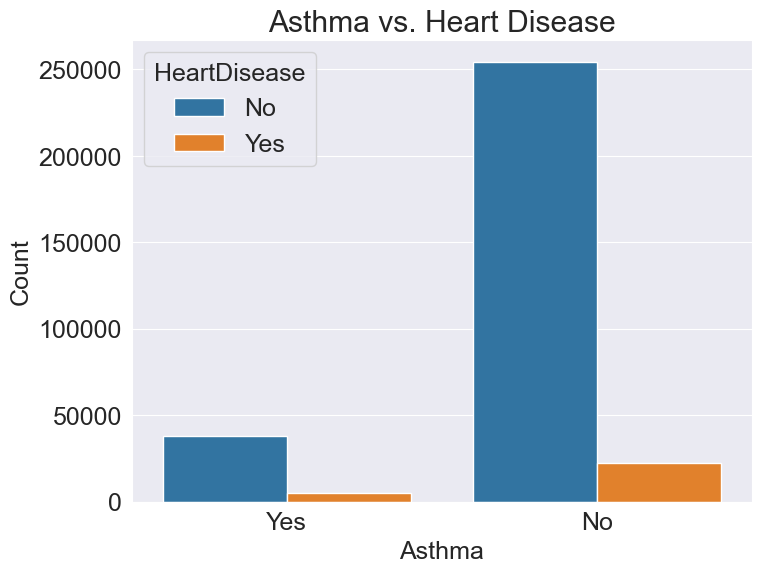

In [30]:
# Bar Chart for Asthma vs. HeartDisease
plt.figure(figsize=(8, 6))
sns.countplot(x='Asthma', hue='HeartDisease', data=df)
plt.title('Asthma vs. Heart Disease')
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.show()


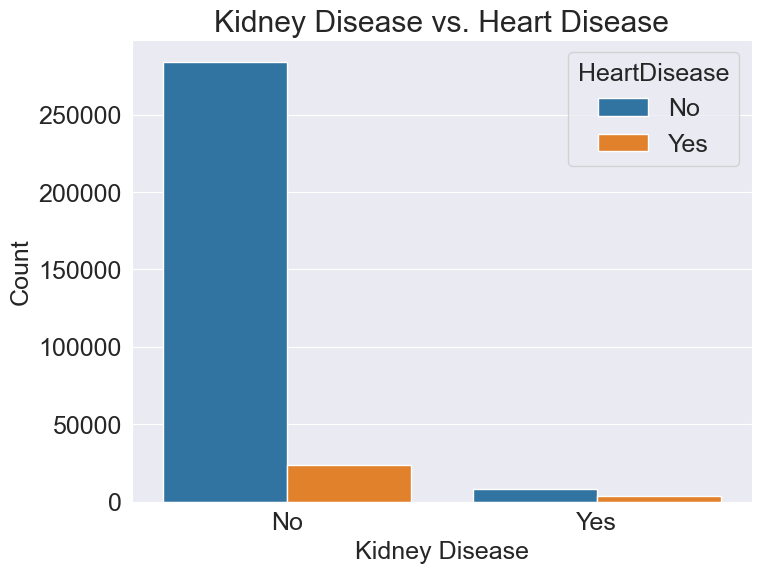

In [31]:
# Bar Chart for KidneyDisease vs. HeartDisease
plt.figure(figsize=(8, 6))
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df)
plt.title('Kidney Disease vs. Heart Disease')
plt.xlabel('Kidney Disease')
plt.ylabel('Count')
plt.show()


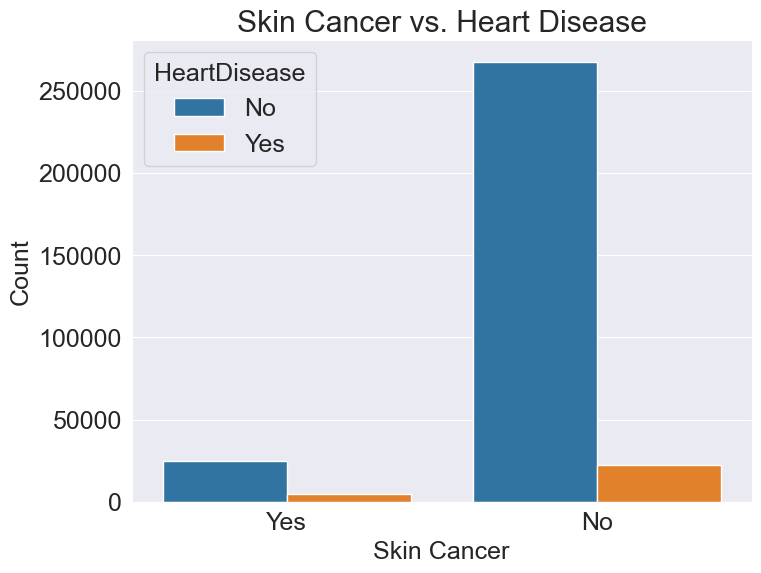

In [32]:
# Bar Chart for SkinCancer vs. HeartDisease
plt.figure(figsize=(8, 6))
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df)
plt.title('Skin Cancer vs. Heart Disease')
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.show()
